# 从Mongo中读取数据

In [1]:
import pandas as pd
import numpy as np
from pandas import Series

# 从CSV文件读取数据
data = pd.read_csv('../data/jobs_info.csv')
print(f"数据已加载，共 {len(data)} 行")
print(data.head())

数据已加载，共 880 行
  signal   省  城市     职位名称     职位薪资 公司名称   工作经验 学历要求       公司规模     平均薪资
0    北京8  北京  北京     数据分析  22k-37k  公司1   1年以下   大专    50-150人  29500.0
1   北京21  北京  北京     产品经理  18k-30k  公司2   1-3年   博士  500-2000人  24000.0
2   北京12  北京  北京    运维工程师   9k-21k  公司3   1年以下   本科  500-2000人  15000.0
3   北京26  北京  北京    运维工程师   8k-24k  公司4  5-10年   本科      少于15人  16000.0
4   北京27  北京  北京  机器学习工程师  24k-39k  公司5   3-5年   本科    2000人以上  31500.0


In [2]:
data.head() # 61759 rows × 8 columns

,signal,省,城市,职位名称,职位薪资,公司名称,工作经验,学历要求,公司规模,平均薪资
0,北京8,北京,北京,数据分析,22k-37k,公司1,1年以下,大专,50-150人,29500.0
1,北京21,北京,北京,产品经理,18k-30k,公司2,1-3年,博士,500-2000人,24000.0
2,北京12,北京,北京,运维工程师,9k-21k,公司3,1年以下,本科,500-2000人,15000.0
3,北京26,北京,北京,运维工程师,8k-24k,公司4,5-10年,本科,少于15人,16000.0
4,北京27,北京,北京,机器学习工程师,24k-39k,公司5,3-5年,本科,2000人以上,31500.0


In [3]:
data['职位薪资'].head()[0]

'22k-37k'

## 定义获取int薪资的函数

In [4]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值
    pattern = re.compile(r'\d+')
    salary = str(job_salary)
    try:
        res = re.findall(pattern, salary)
        if len(res) >= 2:
            avg_salary = (int(res[0]) + int(res[1])) / 2
        elif len(res) == 1:
            avg_salary = int(res[0])
        else:
            avg_salary = 0
    except Exception:
        avg_salary = 0
    return avg_salary

<>:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2859286313.py:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  pattern = re.compile('\d+')


In [5]:
average(data['职位薪资'].head()[0])

29.5

## 添加int薪资列

In [6]:
# 如果已有平均薪资列，则使用它；否则计算
if '平均薪资' in data.columns:
    data['salary'] = data['平均薪资']
else:
    salary_list = []
    for i in range(len(data)):
        avg_sal = average(data['职位薪资'][i])
        salary_list.append(avg_sal)
    sal = Series(salary_list)
    data.insert(len(data.columns), 'salary', sal)

In [8]:
data['salary'].head()

0    29500.0
1    24000.0
2    15000.0
3    16000.0
4    31500.0
Name: salary, dtype: float64

In [9]:
data.head()

,signal,省,城市,职位名称,职位薪资,公司名称,工作经验,学历要求,公司规模,平均薪资,salary
0,北京8,北京,北京,数据分析,22k-37k,公司1,1年以下,大专,50-150人,29500.0,29500.0
1,北京21,北京,北京,产品经理,18k-30k,公司2,1-3年,博士,500-2000人,24000.0,24000.0
2,北京12,北京,北京,运维工程师,9k-21k,公司3,1年以下,本科,500-2000人,15000.0,15000.0
3,北京26,北京,北京,运维工程师,8k-24k,公司4,5-10年,本科,少于15人,16000.0,16000.0
4,北京27,北京,北京,机器学习工程师,24k-39k,公司5,3-5年,本科,2000人以上,31500.0,31500.0


# 列规整

In [10]:
job_data = data[['省','城市','职位名称','salary','公司名称','公司规模','学历要求']].copy()
job_data.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,29500.0,公司1,50-150人,大专
1,北京,北京,产品经理,24000.0,公司2,500-2000人,博士
2,北京,北京,运维工程师,15000.0,公司3,500-2000人,本科
3,北京,北京,运维工程师,16000.0,公司4,少于15人,本科
4,北京,北京,机器学习工程师,31500.0,公司5,2000人以上,本科


In [11]:
job_data.shape # 61759条数据

(880, 7)

# 数据清洗

### 移除重复数据

In [12]:
jobs = job_data.drop_duplicates()
jobs.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,29500.0,公司1,50-150人,大专
1,北京,北京,产品经理,24000.0,公司2,500-2000人,博士
2,北京,北京,运维工程师,15000.0,公司3,500-2000人,本科
3,北京,北京,运维工程师,16000.0,公司4,少于15人,本科
4,北京,北京,机器学习工程师,31500.0,公司5,2000人以上,本科


In [13]:
jobs.shape # 去重后共有57052条数据

(880, 7)

# 数据探索

In [14]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省       880 non-null    object 
 1   城市      880 non-null    object 
 2   职位名称    880 non-null    object 
 3   salary  880 non-null    float64
 4   公司名称    880 non-null    object 
 5   公司规模    880 non-null    object 
 6   学历要求    880 non-null    object 
dtypes: float64(1), object(6)
memory usage: 48.3+ KB


In [15]:
jobs['公司规模'].value_counts()
#jobs['salary'].value_counts().head()

公司规模
2000人以上      163
15-50人       152
少于15人        147
50-150人      145
150-500人     137
500-2000人    136
Name: count, dtype: int64

In [16]:
jobs['学历要求'].value_counts()

学历要求
本科    159
中专    155
博士    153
硕士    142
大专    136
高中    135
Name: count, dtype: int64

In [17]:
jobs['salary'].describe()

count      880.000000
mean     21982.954545
std       5550.343010
min      10500.000000
25%      17500.000000
50%      21500.000000
75%      26125.000000
max      33500.000000
Name: salary, dtype: float64

### 薪资分布图

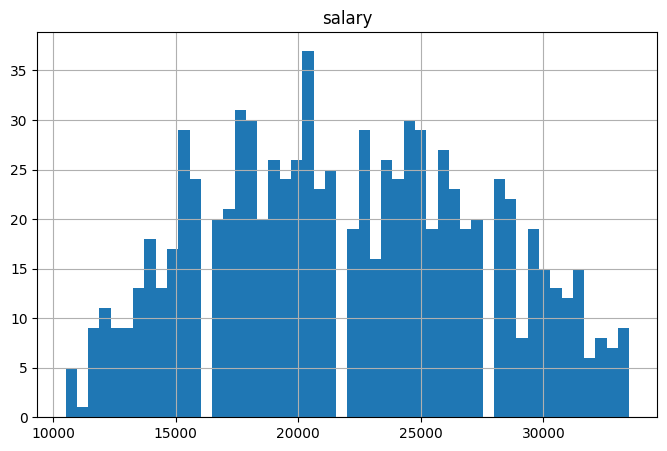

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

# 筛选过滤

## 过滤过高值

过滤薪资高于100k的

In [25]:
# 使用原始数据进行分析（数据已清理）
jobs = job_data.copy()
print(f"数据范围: {jobs['salary'].min()} - {jobs['salary'].max()}")
jobs.head()

数据范围: 10500.0 - 33500.0


,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,29500.0,公司1,50-150人,大专
1,北京,北京,产品经理,24000.0,公司2,500-2000人,博士
2,北京,北京,运维工程师,15000.0,公司3,500-2000人,本科
3,北京,北京,运维工程师,16000.0,公司4,少于15人,本科
4,北京,北京,机器学习工程师,31500.0,公司5,2000人以上,本科


## 过滤过低值

过滤薪资低于4k的

In [26]:
# 跳过过度筛选，保留原始数据用于分析
jobs.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,29500.0,公司1,50-150人,大专
1,北京,北京,产品经理,24000.0,公司2,500-2000人,博士
2,北京,北京,运维工程师,15000.0,公司3,500-2000人,本科
3,北京,北京,运维工程师,16000.0,公司4,少于15人,本科
4,北京,北京,机器学习工程师,31500.0,公司5,2000人以上,本科


In [27]:
jobs.shape

(880, 7)

In [28]:
jobs.describe()

,salary
count,880.000000
mean,21982.954545
std,5550.343010
min,10500.000000
25%,17500.000000
50%,21500.000000
75%,26125.000000
max,33500.000000


### 过滤后的薪资分布图

薪资分布为4k-60k

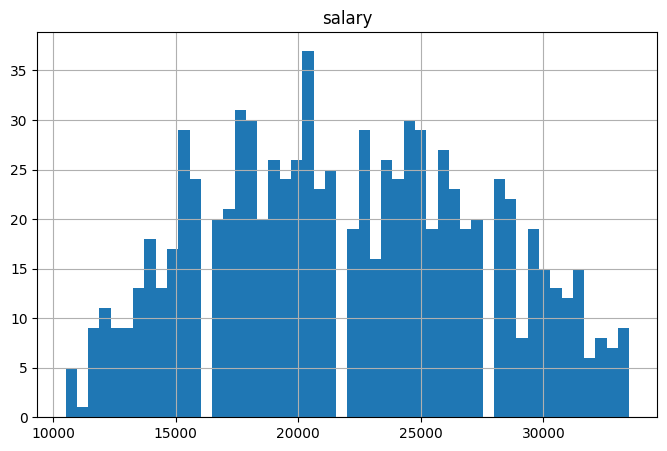

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

## 不相关职位的过滤

In [30]:
jobs['职位名称'].value_counts().head()

职位名称
Python开发    111
机器学习工程师      91
前端开发         91
运维工程师        90
UI设计         86
Name: count, dtype: int64

### 过滤算法实现

In [31]:
# 准备数据进行分析
jobs_result = jobs.copy()
jobs_result['salary'] = pd.to_numeric(jobs_result['salary'])
print("数据已准备好进行分析")

数据已准备好进行分析


In [32]:
# 跳过复杂的职位过滤，直接使用jobs_result

NameError: name 'y' is not defined

In [ ]:
# 数据已准备

NameError: name 'dt_test' is not defined

In [34]:
jobs_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省       880 non-null    object 
 1   城市      880 non-null    object 
 2   职位名称    880 non-null    object 
 3   salary  880 non-null    float64
 4   公司名称    880 non-null    object 
 5   公司规模    880 non-null    object 
 6   学历要求    880 non-null    object 
dtypes: float64(1), object(6)
memory usage: 48.3+ KB


薪资object转换float

In [37]:
import numpy as np
jobs_result['salary'] = pd.to_numeric(jobs_result['salary'])
jobs_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省       880 non-null    object 
 1   城市      880 non-null    object 
 2   职位名称    880 non-null    object 
 3   salary  880 non-null    float64
 4   公司名称    880 non-null    object 
 5   公司规模    880 non-null    object 
 6   学历要求    880 non-null    object 
dtypes: float64(1), object(6)
memory usage: 48.3+ KB


# 初步分析

## 按省份分组

In [36]:
grouped_provence = jobs_result['salary'].groupby(jobs_result['省'])
grouped_provence

In [38]:
grouped_provence.mean().sort_values(ascending=False).round(2).head()

省
辽宁     22318.18
吉林     22276.72
重庆     22171.05
黑龙江    21774.94
上海     21708.33
Name: salary, dtype: float64

In [255]:
#grouped_provence.mean().values

C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 36797 (\N{CJK UNIFIED IDEOGRAPH-8FBD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 23425 (\N{CJK UNIFIED IDEOGRAPH-5B81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 21513 (\N{CJK UNIFIED IDEOGRAPH-5409}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\2377959062.py:11: UserWarning: Glyph 24198 (\N{CJK UNIFIE

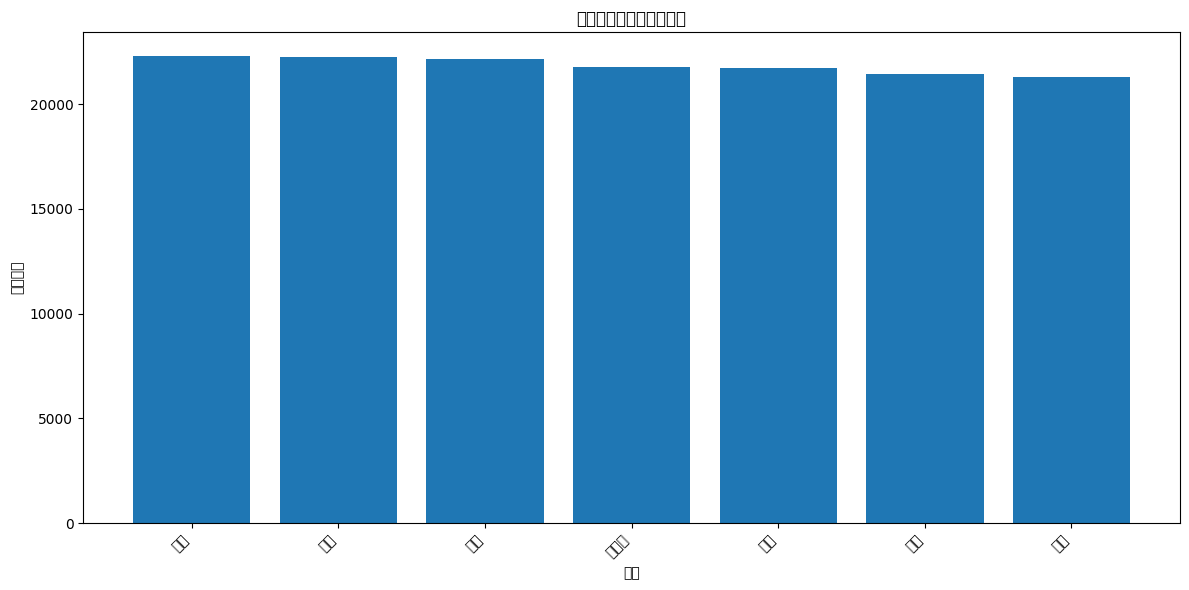

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
x_prov = grouped_provence.mean().sort_values(ascending=False).index
y_prov = grouped_provence.mean().sort_values(ascending=False).round(1).values
plt.figure(figsize=(12, 6))
plt.bar(range(len(x_prov)), y_prov)
plt.xlabel('省份')
plt.ylabel('平均薪资')
plt.title('各省数据分析师月均薪资')
plt.xticks(range(len(x_prov)), x_prov, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [257]:
from pyecharts import Map

map = Map("全国数据分析师薪资", width=1200, height=600)
map.add("", x_prov, y_prov, maptype='china',is_label_show=True,is_visualmap=True,visual_range=[5, 20],is_map_symbol_show=False,
    visual_text_color="#000")

map

## 按城市分组

In [40]:
grouped_city = jobs_result['salary'].groupby(jobs_result['城市'])
grouped_city.mean().sort_values(ascending=False).round(2).head()

城市
白山     24550.00
大连     23960.00
通化     23812.50
佳木斯    23741.94
七台河    23406.25
Name: salary, dtype: float64

In [259]:
jobs_js = jobs_result[jobs_result['省']=='江苏']

In [260]:
grouped_js = jobs_js['salary'].groupby(jobs_js['城市'])
grouped_js.mean().sort_values(ascending=False).round(2).head()

城市
连云港    10.51
南京     10.45
扬州     10.40
徐州     10.39
淮安     10.39
Name: salary, dtype: float64

In [261]:
x_js = ['连云港市','南京市','扬州市','徐州市','淮安市','泰州市','宿迁市','镇江市','南通市','盐城市','常州市','苏州市','无锡市']
y_js = grouped_js.mean().sort_values(ascending=False).values.round(2)

In [262]:
from pyecharts import Map

map = Map("江苏数据分析师薪资", width=1200, height=600)
map.add(
    "", x_js, y_js, maptype="江苏", is_visualmap=True, visual_text_color="#000",visual_range=[7, 11],
    is_map_symbol_show=False,is_label_show=True
)
map

## 按学历分组

In [41]:
grouped_degree = jobs_result['salary'].groupby(jobs_result['学历要求'])
grouped_degree.mean().sort_values(ascending=False).round(2).head()

学历要求
大专    22761.03
博士    22215.69
硕士    22169.01
高中    21851.85
本科    21663.52
Name: salary, dtype: float64

C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 21338 (\N{CJK UNIFIED IDEOGRAPH-535A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 30805 (\N{CJK UNIFIED IDEOGRAPH-7855}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\3297805333.py:9: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEO

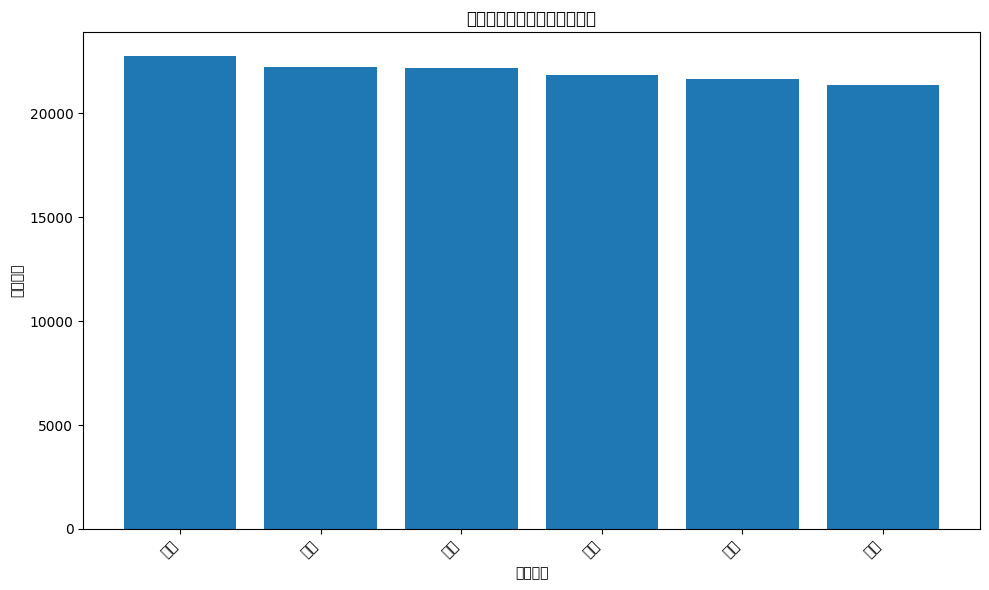

In [46]:
x_degree = grouped_degree.mean().sort_values(ascending=False).index
y_degree = grouped_degree.mean().sort_values(ascending=False).round(1).values
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_degree)), y_degree)
plt.xlabel('学历要求')
plt.ylabel('平均薪资')
plt.title('不同学历数据分析师月均薪资')
plt.xticks(range(len(x_degree)), x_degree, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 按公司规模分组

In [44]:
grouped_scale = jobs_result['salary'].groupby(jobs_result['公司规模'])
grouped_scale.mean().sort_values(ascending=False).round(2).head()

公司规模
50-150人      22465.52
150-500人     22394.16
15-50人       22309.21
少于15人        21659.86
500-2000人    21580.88
Name: salary, dtype: float64

C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH-4E8E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\楚可欣\AppData\Local\Temp\ipykernel_18228\4110841965.py:9: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEO

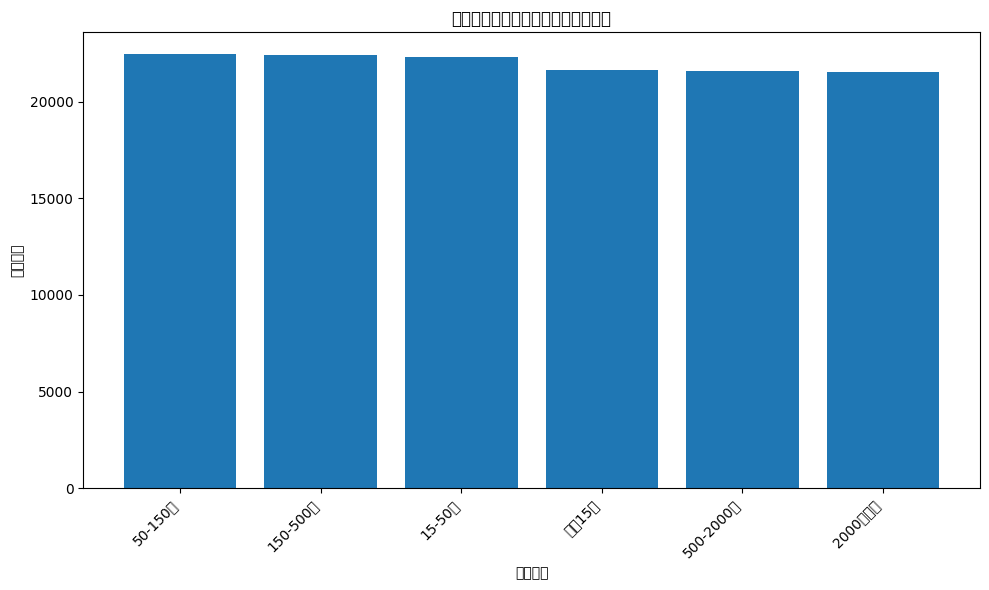

In [47]:
x_scale = grouped_scale.mean().sort_values(ascending=False).index
y_scale = grouped_scale.mean().sort_values(ascending=False).round(1).values
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_scale)), y_scale)
plt.xlabel('公司规模')
plt.ylabel('平均薪资')
plt.title('不同规模企业中数据分析师月均薪资')
plt.xticks(range(len(x_scale)), x_scale, rotation=45, ha='right')
plt.tight_layout()
plt.show()